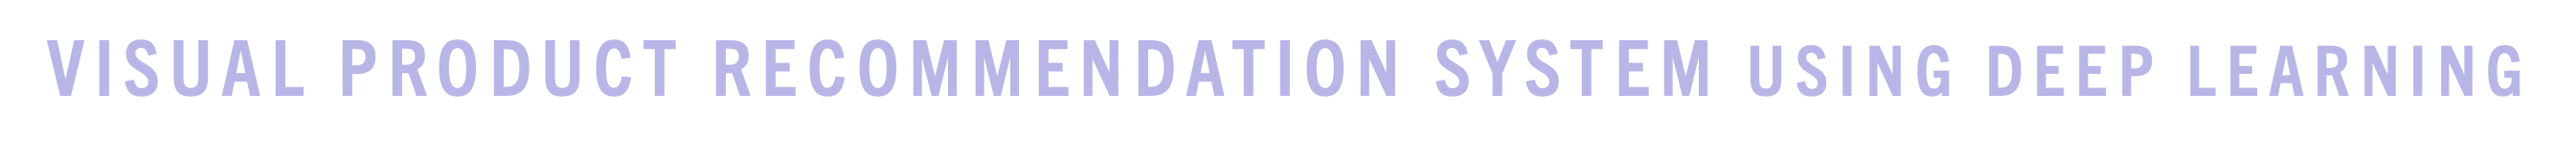

# **Data Loading & Library Installations**

# Data Loading - **Images**

Images already exist at: /content/drive/MyDrive/Data Sets/All_images


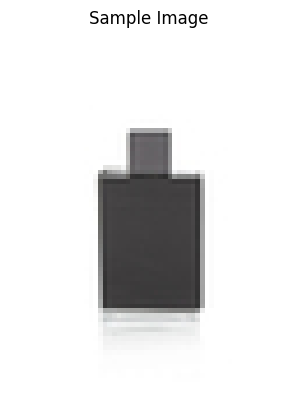

In [ ]:
# Install Pillow if not already installed
!pip install pillow

from google.colab import auth
import gspread
import pandas as pd
import os
import zipfile
from PIL import Image  # Import Image from PIL
import matplotlib.pyplot as plt

# Authenticate user
auth.authenticate_user()

# Authenticate and initialize gspread
from google.auth import default
creds, _ = default()
client = gspread.authorize(creds)

# Paths
zip_path = '/content/drive/MyDrive/Data Sets/Images/images.zip'
extract_dir = '/content/drive/MyDrive/Data Sets/All_images'
extract_dir_1 = '/content/drive/MyDrive/Data Sets/All_images/images'

# Unzip the images if needed
if not os.path.exists(extract_dir_1):  # Check if already extracted
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Images extracted to: {extract_dir}")
else:
    print(f"Images already exist at: {extract_dir}")

# Load sample image
image_files = os.listdir(extract_dir_1)  # Get list of all image files
sample_image_path = os.path.join(extract_dir_1, image_files[0])  # Path to the first image

# Open and display the sample image
image = Image.open(sample_image_path)  # Ensure Image is imported
plt.imshow(image)
plt.axis('off')
plt.title("Sample Image")
plt.show()


In [ ]:
all_files = set(os.listdir(extract_dir_1))

len(all_files) #44441

44441

# Data Loading - **MetaData**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

GOOGLE_SHEET_URL = "https://docs.google.com/spreadsheets/d/1nVWqF_CJKyuD_cRYLiAqPzf7qZKjBCG6Ez3lE4oy7A4/edit?usp=share_link"
sheet = client.open_by_url(GOOGLE_SHEET_URL)
worksheet = sheet.sheet1

data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [ ]:
print(df.head())

len(df) #44446

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  
1  2012  Casual             Peter England Men Party Blue Jeans  
2  2016  Casual                       Titan Women Silver Watch  
3  2011  Casual  Manchester United Men Solid Black Track Pants  
4  2012  Casual                          Puma Men Grey T-shirt  


44446

# **Data** **Cleaning**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


In [ ]:
df = df.dropna(subset=['id', 'masterCategory', 'subCategory', 'articleType'])

len(df)

44446

In [ ]:
df['image'] = df['id'].apply(lambda x: f"{x}.jpg")
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
existing_images = set(os.listdir(extract_dir_1))
df['image_exists'] = df['image'].apply(lambda x: x if x in existing_images else None)

entry_counts = df['image_exists'].value_counts(dropna=False)

print("Unique entries and their counts")
print(entry_counts)

Unique entries and their counts
image_exists
None         5
15970.jpg    1
8002.jpg     1
13953.jpg    1
6198.jpg     1
            ..
44441.jpg    1
45593.jpg    1
36061.jpg    1
52524.jpg    1
51623.jpg    1
Name: count, Length: 44442, dtype: int64


In [ ]:
df['image_exists'] = df['image'].apply(lambda x: x if x in all_files else None)

# Check counts of valid and missing images
valid_images_count = df['image_exists'].notnull().sum()
missing_images_count = df['image_exists'].isnull().sum()

print(f"Valid images: {valid_images_count}")
print(f"Missing images: {missing_images_count}")

Valid images: 44441
Missing images: 5


In [ ]:
missing_images = df[df['image_exists'].isnull()]['image']
print(f"Sample of missing images: {missing_images.tolist()[:10]}")

Sample of missing images: ['39403.jpg', '39410.jpg', '39401.jpg', '39425.jpg', '12347.jpg']


In [ ]:
df_cleaned = df.dropna(subset=['image_exists'])
len(df_cleaned)

44441

# **Exploratory Data Analysis**

In [ ]:
subcategories_count = df_cleaned.groupby('masterCategory')['subCategory'].nunique()

subcategories_count_df = subcategories_count.reset_index()
subcategories_count_df.columns = ['Master Category', 'Number of Subcategories']

# Print the result
print(subcategories_count_df)

  Master Category  Number of Subcategories
0     Accessories                       20
1         Apparel                        8
2        Footwear                        3
3      Free Items                        2
4            Home                        1
5   Personal Care                       11
6  Sporting Goods                        2


In [ ]:
# Filter data for the specified master categories
filtered_df = df_cleaned[df_cleaned['masterCategory'].isin(['Accessories', 'Apparel'])]

# Group by 'masterCategory' and count the number of images
images_count = filtered_df.groupby('masterCategory')['image_exists'].count()

# Convert to a DataFrame for better visualization
images_count_df = images_count.reset_index()
images_count_df.columns = ['Master Category', 'Number of Images']

# Print the result
print(images_count_df)

  Master Category  Number of Images
0     Accessories             11289
1         Apparel             21395


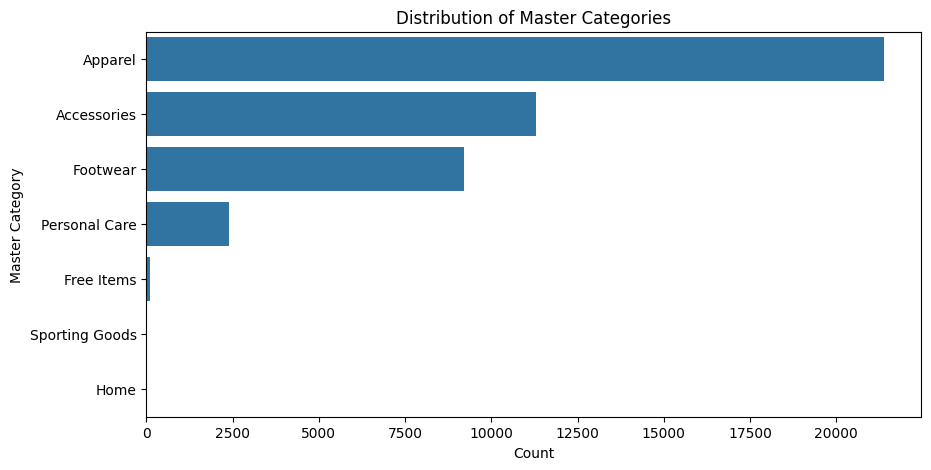

In [ ]:
# Distribution of masterCategory
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned['masterCategory'], order = df_cleaned['masterCategory'].value_counts().index)
plt.title("Distribution of Master Categories")
plt.xlabel("Count")
plt.ylabel("Master Category")
plt.show()

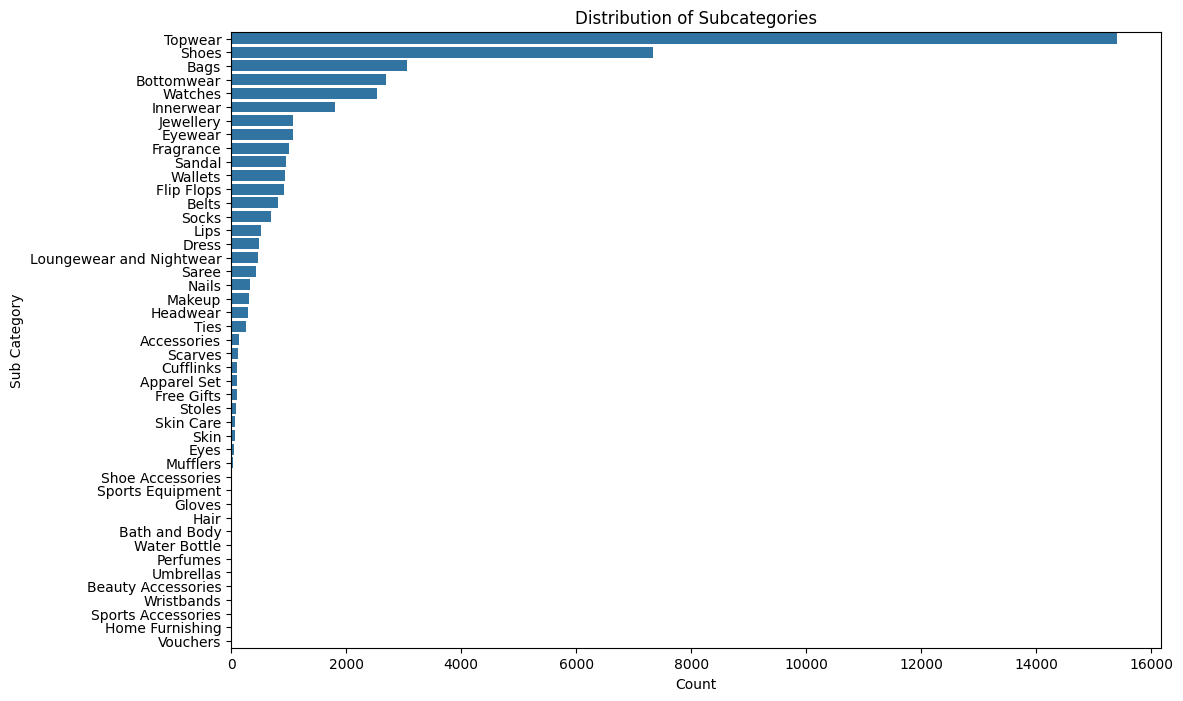

In [ ]:
# Distribution of subCategory
plt.figure(figsize=(12, 8))
sns.countplot(y=df_cleaned['subCategory'], order=df_cleaned['subCategory'].value_counts().index)
plt.title("Distribution of Subcategories")
plt.xlabel("Count")
plt.ylabel("Sub Category")
plt.show()

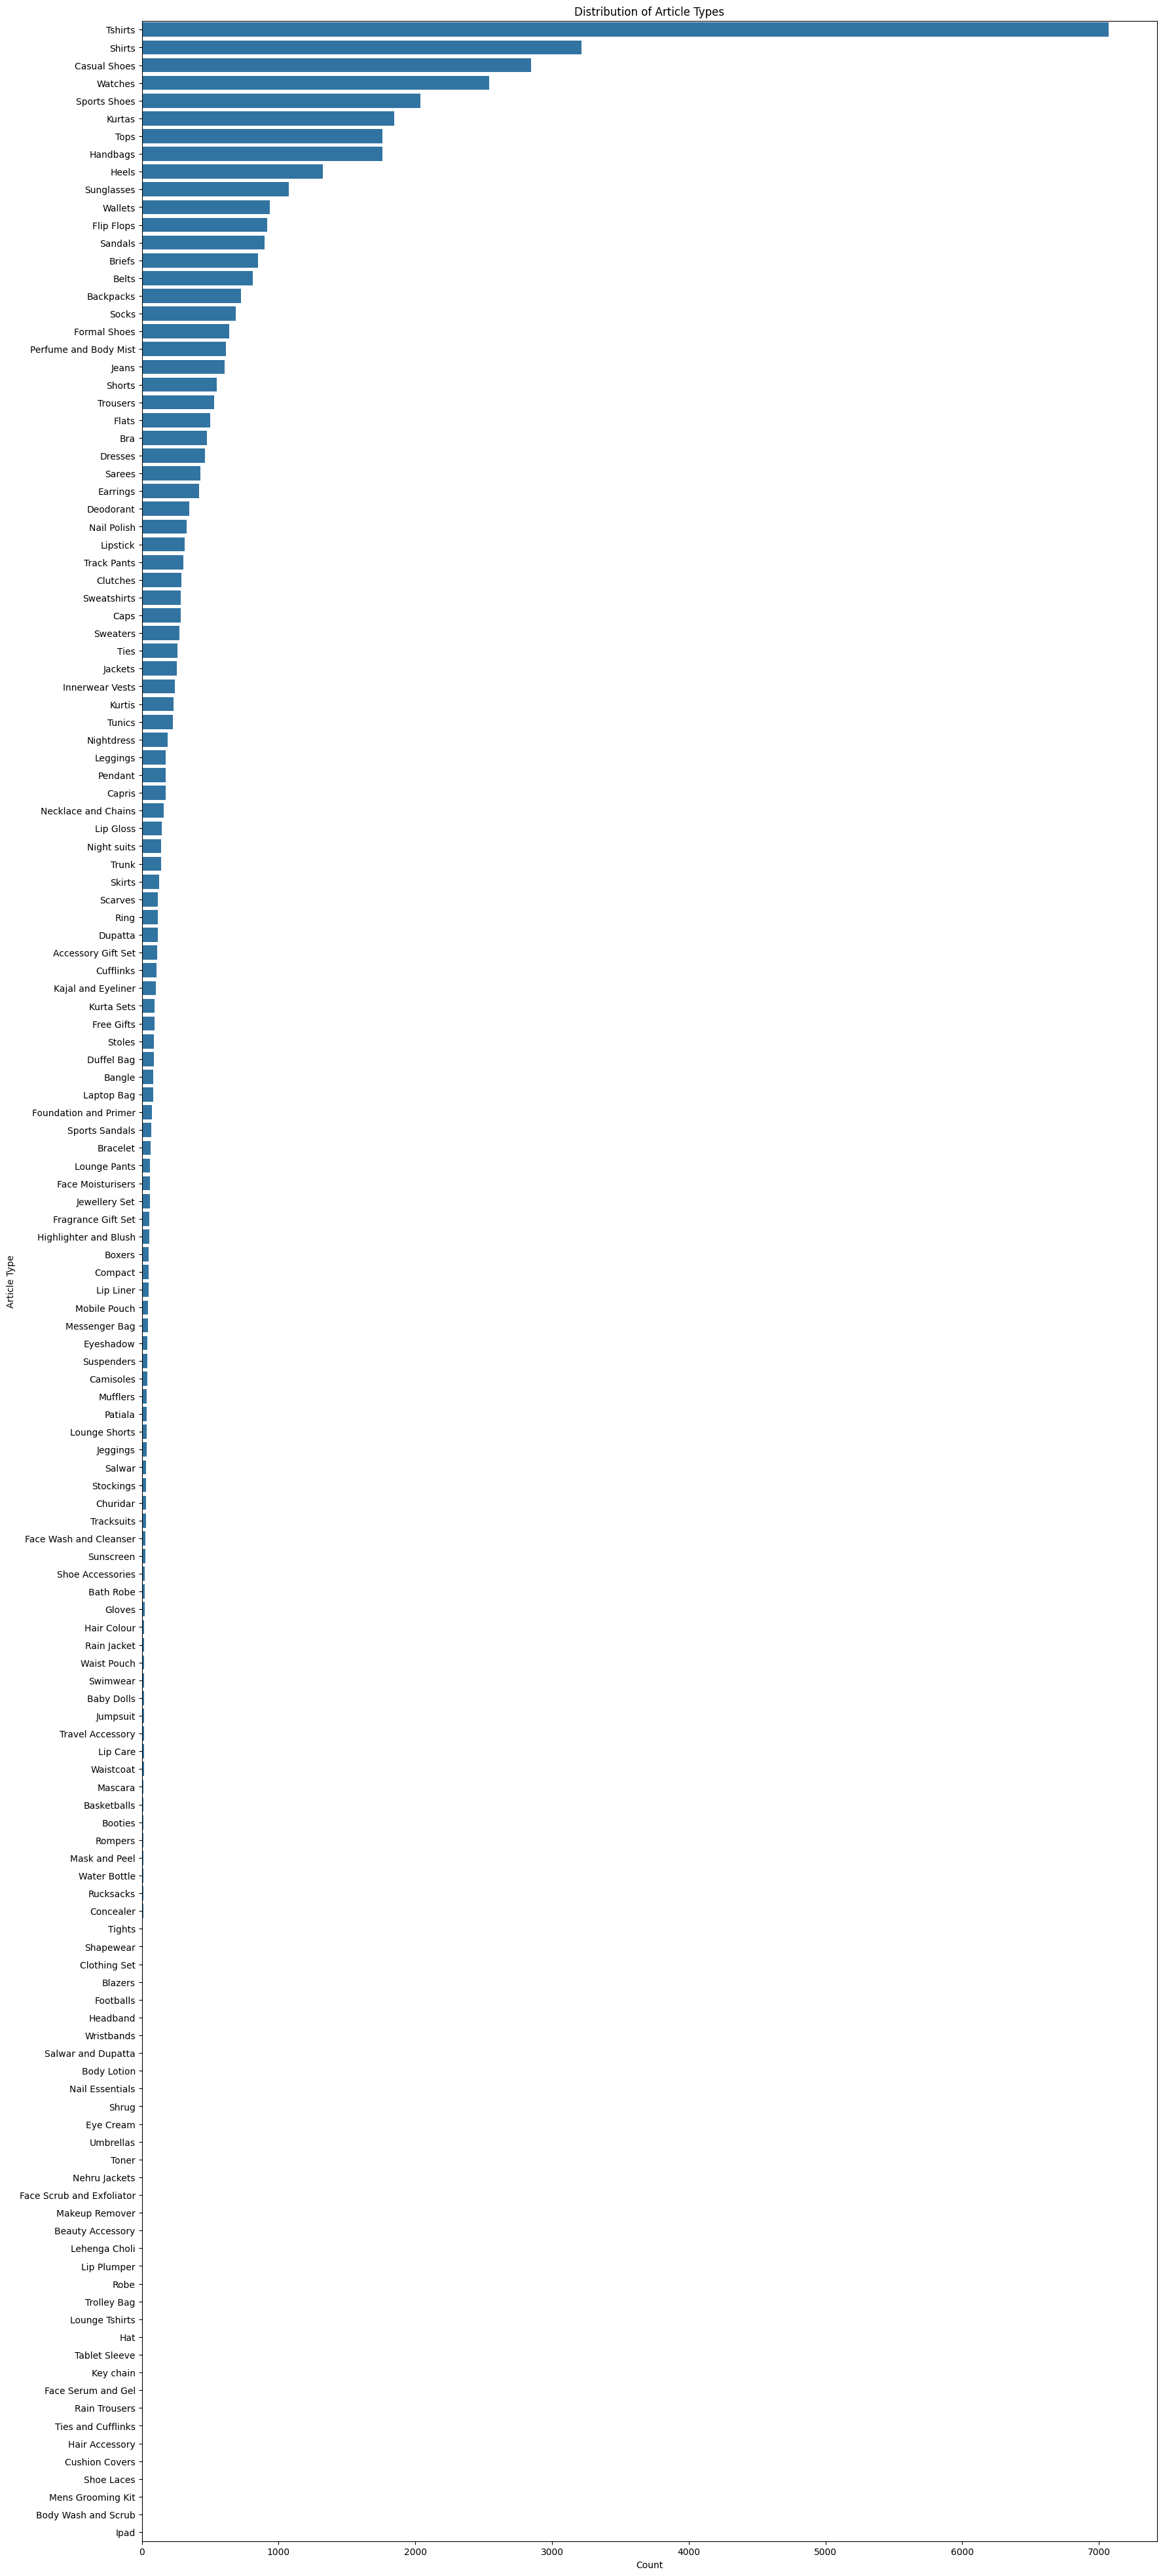

In [ ]:
# Distribution of articleType
plt.figure(figsize=(20, 50))
sns.countplot(y=df_cleaned['articleType'], order=df_cleaned['articleType'].value_counts().index)
plt.title("Distribution of Article Types")
plt.xlabel("Count")
plt.ylabel("Article Type")
plt.show()

**Creating a new dataframe with half of the images since the current processing is very long and tediuos **

In [ ]:
accessories_df = df_cleaned[df_cleaned['masterCategory'] == 'Accessories']
apparel_df = df_cleaned[df_cleaned['masterCategory'] == 'Apparel']

# Calculate 50% sample sizes
accessories_sample_size = int(0.3 * len(accessories_df))
apparel_sample_size = int(0.2 * len(apparel_df))

# Randomly sample 50% of entries
accessories_sample = accessories_df.sample(n=accessories_sample_size, random_state=42)
apparel_sample = apparel_df.sample(n=apparel_sample_size, random_state=42)

# Combine the samples into a new DataFrame
subset_df = pd.concat([accessories_sample, apparel_sample], ignore_index=True)

len(subset_df)

7665

# Now we have a new subset with only 7,665 images for faster processing

In [ ]:
print("Unique master categories:", subset_df['masterCategory'].nunique())
print("Unique subcategories:", subset_df['subCategory'].nunique())
print("Unique article types:", subset_df['articleType'].nunique())

Unique master categories: 2
Unique subcategories: 26
Unique article types: 91


In [ ]:
print("Master Categories:", subset_df['masterCategory'].unique())
print("Subcategories:", subset_df['subCategory'].unique())
print("Article Types:", subset_df['articleType'].unique())

Master Categories: ['Accessories' 'Apparel']
Subcategories: ['Wallets' 'Eyewear' 'Headwear' 'Watches' 'Bags' 'Socks' 'Jewellery'
 'Cufflinks' 'Mufflers' 'Ties' 'Belts' 'Accessories' 'Stoles' 'Scarves'
 'Gloves' 'Shoe Accessories' 'Umbrellas' 'Water Bottle' 'Perfumes'
 'Topwear' 'Bottomwear' 'Innerwear' 'Saree' 'Apparel Set'
 'Loungewear and Nightwear' 'Dress']
Article Types: ['Wallets' 'Sunglasses' 'Caps' 'Watches' 'Handbags' 'Socks' 'Backpacks'
 'Earrings' 'Cufflinks' 'Bracelet' 'Necklace and Chains' 'Clutches'
 'Mufflers' 'Ties' 'Belts' 'Accessory Gift Set' 'Ring' 'Pendant' 'Stoles'
 'Travel Accessory' 'Bangle' 'Laptop Bag' 'Scarves' 'Mobile Pouch'
 'Jewellery Set' 'Gloves' 'Water Bottle' 'Duffel Bag' 'Shoe Accessories'
 'Waist Pouch' 'Headband' 'Hat' 'Messenger Bag' 'Umbrellas' 'Rucksacks'
 'Tablet Sleeve' 'Trolley Bag' 'Perfume and Body Mist' 'Kurtas' 'Jeans'
 'Shirts' 'Tshirts' 'Tops' 'Sweatshirts' 'Briefs' 'Shorts' 'Sarees'
 'Trunk' 'Trousers' 'Track Pants' 'Kurta Sets' 'Sweaters

In [ ]:
# Saving Cleaned File in the location

cleaned_file_path = "/content/drive/MyDrive/Data Sets/Term Project Data/cleaned_styles.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

# **Pre Processing of the Data (Images)**

In [ ]:
print(subset_df.columns)

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image',
       'image_exists'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['masterCategory', 'subCategory', 'articleType', 'baseColour']:
    le = LabelEncoder()
    subset_df[col] = le.fit_transform(subset_df[col])
    label_encoders[col] = le

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Encode Target Column
label_encoders = {}
for col in ['masterCategory', 'subCategory', 'articleType', 'baseColour']:
    le = LabelEncoder()
    subset_df.loc[:, col] = le.fit_transform(subset_df[col])
    label_encoders[col] = le

# Add category_encoded if not already present
if 'category_encoded' not in subset_df.columns:
    subset_df['category_encoded'] = subset_df['articleType']  # Or any column you choose for encoding

# Filter out classes with fewer than two samples
category_counts = subset_df['category_encoded'].value_counts()
valid_categories = category_counts[category_counts > 1].index
subset_df = subset_df[subset_df['category_encoded'].isin(valid_categories)]

# Split Data into Train and Test
train_df, test_df = train_test_split(
    subset_df, test_size=0.2, random_state=42, stratify=subset_df['category_encoded']
)


# Split Data into Train and Validation
train_df, val_df = train_test_split(
    train_df, test_size=0.1, random_state=42, stratify=train_df['category_encoded']
)

print("Train, validation, and test datasets prepared.")


Train, validation, and test datasets prepared.


In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    horizontal_flip=True,
)

batch_size = 64

train_gen = datagen.flow_from_dataframe(
    train_df,
    directory=extract_dir_1,
    x_col='image_exists',
    y_col='category_encoded',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='raw',
    workers=4
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    directory=extract_dir_1,
    x_col='image_exists',
    y_col='category_encoded',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='raw',
    workers=4
)

test_gen = datagen.flow_from_dataframe(
    test_df,
    directory=extract_dir_1,
    x_col='image_exists',
    y_col='category_encoded',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False,
    workers=4
)

print("Data generators prepared.")


Found 5511 validated image filenames.
Found 613 validated image filenames.
Found 1532 validated image filenames.
Data generators prepared.


In [ ]:
print("Class Distribution in Train Set:")
print(train_df['category_encoded'].value_counts())

print("\nClass Distribution in Validation Set:")
print(val_df['category_encoded'].value_counts())

print("\nClass Distribution in Test Set:")
print(test_df['category_encoded'].value_counts())

Class Distribution in Train Set:
category_encoded
83    1035
89     554
60     448
23     384
33     259
      ... 
90       2
52       2
54       2
79       2
85       2
Name: count, Length: 82, dtype: int64

Class Distribution in Validation Set:
category_encoded
83    115
89     62
60     50
23     43
33     29
     ... 
22      1
39      1
41      1
11      1
32      1
Name: count, Length: 64, dtype: int64

Class Distribution in Test Set:
category_encoded
83    288
89    154
60    124
23    107
33     72
     ... 
85      1
4       1
66      1
86      1
55      1
Name: count, Length: 74, dtype: int64


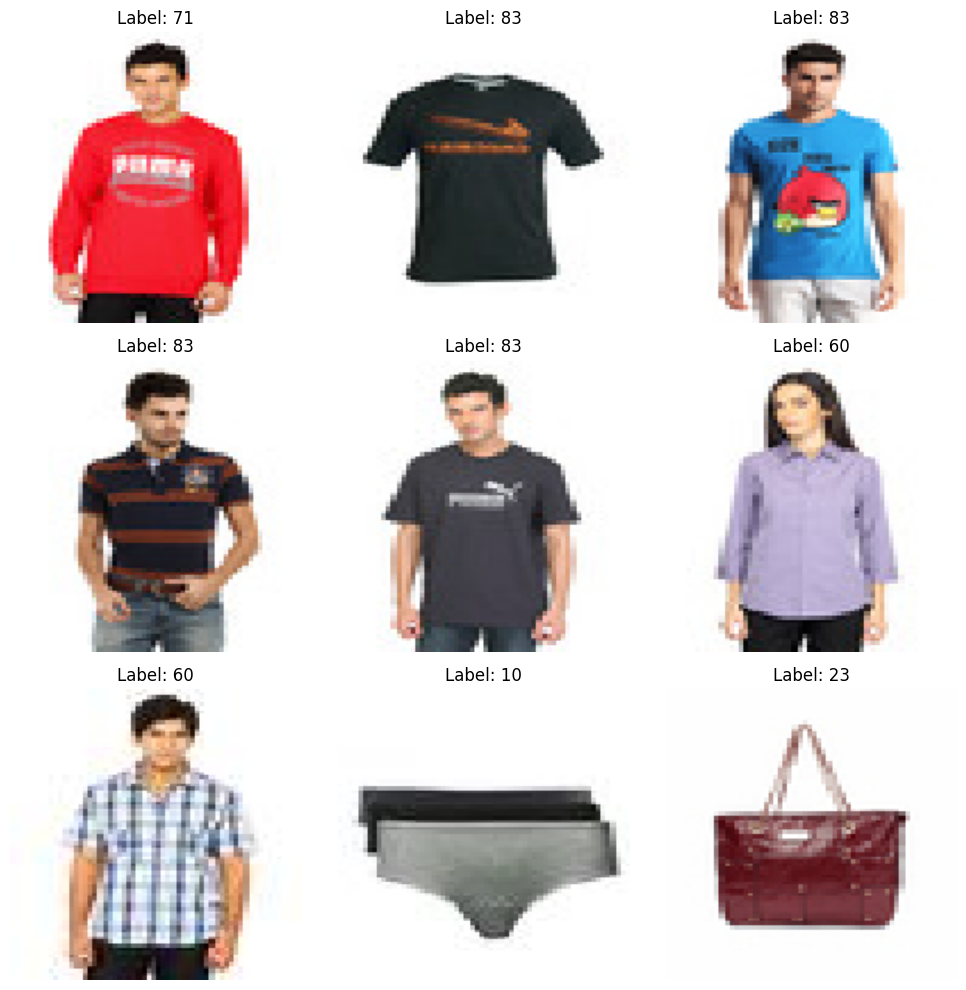

In [ ]:
images, labels = next(train_gen)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# **Setting up Baseline Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_baseline_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model

In [ ]:
# Prepare input shape and number of classes
input_shape = (128, 128, 3)  # Image size and channels
num_classes = len(label_encoders['articleType'].classes_)  # Number of unique classes

# Create and compile the model
model = create_baseline_model(input_shape, num_classes)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
len(train_gen)

87

In [ ]:
steps_per_epoch = train_gen.n // train_gen.batch_size
validation_steps = val_gen.n // val_gen.batch_size

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

KeyboardInterrupt: 

# We have 0.6983 accuracy for Baseline. with train data, we will now check for test data and further optimize the model. (Accidentally re ran it and the output was lost, but you could load the model from the below location)

In [ ]:
model.save('/content/drive/MyDrive/saved_model_base.keras')
print("Model saved successfully in Keras format.")

Model saved successfully in Keras format.


In [ ]:
# Load the model
loaded_model_1 = tf.keras.models.load_model('/content/drive/MyDrive/saved_model.keras')
print("Model loaded successfully")


# Verify that the loaded model works
test_loss, test_accuracy = loaded_model_1.evaluate(test_gen, steps=len(test_gen), verbose=1)
print(f"Test Accuracy with loaded model-  {test_accuracy * 100:.2f}%")

Model loaded successfully
24/24 ━━━━━━━━━━━━━━━━━━━━ 540s 23s/step - accuracy: 0.6897 - loss: 1.3482
Test Accuracy with loaded model-  69.65%


# We are getting test accuracy of 69.65%

# **Optimizing the Model**

# Method 01 - Batch Normalization

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Define the optimized model with batch normalization

def optimized_model_1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),  # Replaces Flatten
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')

    ])
    return model

In [ ]:
input_shape = (128, 128, 3)  # Image size and channels
num_classes = len(label_encoders['articleType'].classes_)  # Number of unique classes

# Create and compile the model
model_1 = optimized_model_1(input_shape, num_classes)
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model is now ready to be trained
print(model_1.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 91)                  │          23,387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,555 (588.11 KB)

 Trainable params: 150,107 (586.36 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [ ]:
steps_per_epoch = train_gen.n // train_gen.batch_size
validation_steps = val_gen.n // val_gen.batch_size

history = model_1.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model_1.evaluate(test_gen, steps=len(test_gen), verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 853ms/step - accuracy: 0.2871 - loss: 4.5113
Test Accuracy: 28.98%


# The test accuracy has decreased here to just 28%

In [ ]:
model_1.save('/content/drive/MyDrive/saved_model_optimized.keras')
print("Model saved successfully in Keras format.")

Model saved successfully in Keras format.


# Method 01.1 - Batch Normalization

In [ ]:
# Define the optimized model with batch normalization
def create_baseline_model_v2(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),  # Additional Dense layer
        Dropout(0.5),
        Dense(128, activation='relu'),  # Existing Dense layer
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model


In [ ]:
# Create and compile the model
model_2 = create_baseline_model_v2(input_shape, num_classes)
optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model is now ready to be trained
print(model_2.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 91)                  │          11,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,560,667 (25.03 MB)

 Trainable params: 6,560,667 (25.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
steps_per_epoch = train_gen.n // train_gen.batch_size
validation_steps = val_gen.n // val_gen.batch_size

history = model_2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.1499 - loss: 3.8126 - val_accuracy: 0.4392 - val_loss: 2.2547
Epoch 2/10
 1/86 ━━━━━━━━━━━━━━━━━━━━ 2:30 2s/step - accuracy: 0.3125 - loss: 2.8164

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3125 - loss: 2.8164 - val_accuracy: 0.5135 - val_loss: 2.2507
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4278 - loss: 2.3899 - val_accuracy: 0.6042 - val_loss: 1.5843
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4375 - loss: 2.2701 - val_accuracy: 0.7027 - val_loss: 1.4034
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.5385 - loss: 1.8477 - val_accuracy: 0.6510 - val_loss: 1.3829
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6562 - loss: 1.8301 - val_accuracy: 0.7027 - val_loss: 1.1255
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.6053 - loss: 1.5582 - val_accuracy: 0.6858 - val_loss: 1.1722
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6875 - loss: 1.5200 - val_accuracy: 0.7838 - val_loss: 0.8306
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6582 - loss: 1.3649 - val_accuracy: 0.7292 - val_loss: 1.0797

# Slightly better Test & Validation Accuracy of >70%

In [ ]:
test_loss, test_accuracy = model_2.evaluate(test_gen, steps=len(test_gen), verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 739ms/step - accuracy: 0.7115 - loss: 1.1673
Test Accuracy: 72.13%


In [ ]:
model_2.save('/content/drive/MyDrive/saved_model_optimized_1.keras')
print("Model saved successfully in Keras format.")

Model saved successfully in Keras format.


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
loaded_model_3 = tf.keras.models.load_model('/content/drive/MyDrive/saved_model_optimized_1.keras')
print("Model loaded successfully")

# Verify that the loaded model works
test_loss, test_accuracy = loaded_model_3.evaluate(test_gen, steps=len(test_gen), verbose=1)
print(f"Test Accuracy with loaded model: {test_accuracy * 100:.2f}%")



Model loaded successfully


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 386s 17s/step - accuracy: 0.7153 - loss: 1.1721
Test Accuracy with loaded model: 72.45%


# Recommendation System

In [ ]:
loaded_model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 91)                  │          11,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,682,003 (75.08 MB)

 Trainable params: 6,560,667 (25.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,121,336 (50.05 MB)

In [ ]:
images_not_in_subset = df_cleaned[~df_cleaned['image_exists'].isin(subset_df['image_exists'])]
images_not_in_subset.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_exists
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg,39386.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,21379.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg,30805.jpg


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
import os
import tensorflow as tf

# Load the pre-trained model
model_path = '/content/drive/MyDrive/saved_model_optimized_1.keras'
loaded_model = tf.keras.models.load_model(model_path)
print("Model loaded successfully")

# Function to preprocess an image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array  # No batch dimension; will handle in batching

# Directory containing all images
image_dir = '/content/drive/MyDrive/Data Sets/All_images/images'

# Get all image paths in the folder
image_paths = [
    os.path.join(image_dir, img)
    for img in os.listdir(image_dir)
    if img.lower().endswith(('.jpg', '.jpeg', '.png'))
]

# Predict the model output for the target image (15970.jpg)
target_image_path = '/content/drive/MyDrive/Data Sets/All_images/images/15970.jpg'
target_image_array = preprocess_image(target_image_path)
target_output = loaded_model.predict(np.expand_dims(target_image_array, axis=0)).flatten()
print(f"Model Output for {target_image_path} calculated.")

# Batch process all images
batch_size = 32  # Adjust as needed
similarities = []
num_batches = len(image_paths) // batch_size + int(len(image_paths) % batch_size != 0)

print(f"Processing {len(image_paths)} images in {num_batches} batches...")

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(image_paths))
    batch_paths = image_paths[start_idx:end_idx]

    # Preprocess the batch
    batch_images = np.array([preprocess_image(path) for path in batch_paths])
    batch_images = batch_images / 255.0  # Normalize
    batch_outputs = loaded_model.predict(batch_images)

    # Compute similarity for each image in the batch
    for path, output in zip(batch_paths, batch_outputs):
        if path == target_image_path:  # Skip the target image itself
            continue
        similarity = cosine_similarity([target_output], [output.flatten()])[0][0]
        similarities.append((path, similarity))

    print(f"Processed batch {batch_idx + 1}/{num_batches}")

# Sort by similarity and get the top 5
top_n = 5
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

# Display the results
print("Top 5 similar images:")
for i, (img_path, score) in enumerate(similarities):
    print(f"{i+1}. {img_path} - Similarity: {score:.4f}")


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Model Output for /content/drive/MyDrive/Data Sets/All_images/images/15970.jpg calculated.
Processing 44441 images in 1389 batches...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processed batch 1/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
Processed batch 2/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
Processed batch 3/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
Processed batch 4/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Processed batch 5/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
Processed batch 6/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Processed batch 7/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Processed batch 8/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Processed batch 9/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
Processed batch 10/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step
Processed batch 11/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
Processed batch 12/1389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processed batch 13/13

In [ ]:
import pickle

# Save the similarities to a file
output_file = '/content/drive/MyDrive/similarities.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(similarities, f)

print(f"Similarities saved to {output_file}")


Similarities saved to /content/drive/MyDrive/similarities.pkl


# Final Output of the Recommendation

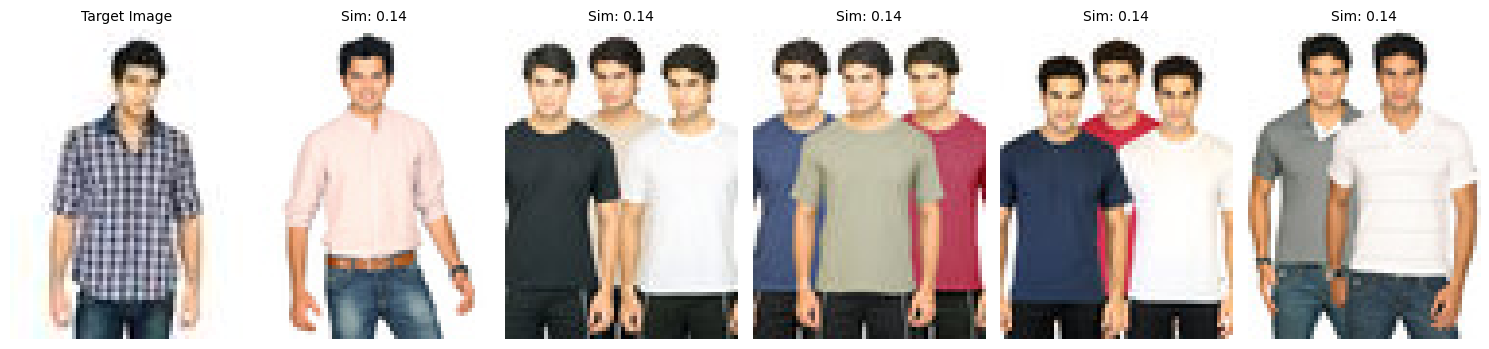

In [ ]:
import matplotlib.pyplot as plt

# Function to display an image with its title
def display_image(image_path, title, ax):
    img = load_img(image_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title, fontsize=10)

# Visualize the target image and top similar images
def visualize_results(target_image_path, top_similarities):
    fig, axes = plt.subplots(1, len(top_similarities) + 1, figsize=(15, 5))

    # Display the target image
    display_image(target_image_path, "Target Image", axes[0])

    # Display the top similar images
    for i, (img_path, score) in enumerate(top_similarities):
        display_image(img_path, f"Sim: {score:.2f}", axes[i + 1])

    plt.tight_layout()
    plt.show()



if len(similarities) > 1:
    reordered_similarities = [similarities[-1]] + similarities[:-1]
else:
    reordered_similarities = similarities  # No change if there's only one image

# Visualize the reordered results
visualize_results(target_image_path, reordered_similarities)
